# Пример 2.1.1

In [52]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
# stats models: regression fitting
import statsmodels.formula.api as smf 
# data visualization
import seaborn as sns 

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df #отображение данных, а если бы мы ввели df.shape, то узнали бы, какими характеристиками обладает таблица

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


<AxesSubplot:xlabel='totwrk', ylabel='sleep'>

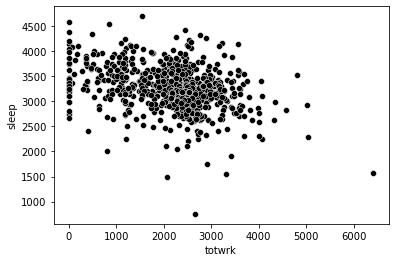

In [54]:
# построим диаграмму рассеяним sleep vs totwrk с ‘подогнанной’ прямой  
sns.scatterplot(data=df, y='sleep', x='totwrk',color='black')

<AxesSubplot:xlabel='totwrk', ylabel='sleep'>

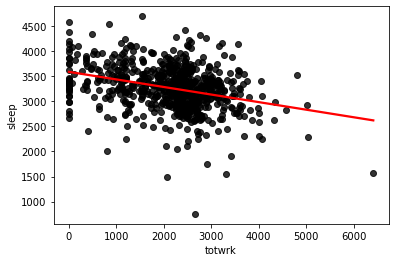

In [55]:
sns.regplot(data=df, y='sleep', x='totwrk', ci=None, color='black', line_kws={"color": "red"})

In [56]:
# подгонка прямой
fitted_line = smf.ols(formula='sleep~totwrk', data=df).fit()
# коэффициенты оптимальной прямой sleep на totwrk с округлением
fitted_line.params.round(2)

Intercept    3586.38
totwrk         -0.15
dtype: float64

# Спецификация
$$ sleep = 3586.38 - 0.15*totwrk $$
Каждая минута работы уменьшает количество сна на 0,15 минуты в неделю.

In [57]:
#найдем параметры оптимальной прямой sleep на totwrk без константы
fitted_line = smf.ols(formula='sleep~-1+totwrk', data=df).fit()
fitted_line.params.round(2)

totwrk    1.26
dtype: float64

# Спецификация
$$ sleep = 1.26*totwrk $$

# Пример 2.1.2

<AxesSubplot:xlabel='age', ylabel='sleep'>

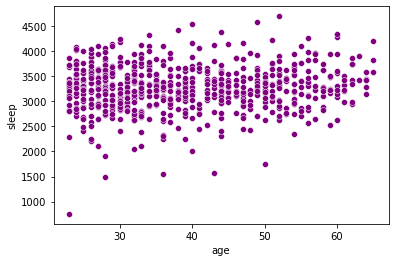

In [58]:
#построим диаграмму рассеяним sleep vs age с ‘подогнанной’ прямой
sns.scatterplot(data=df, y='sleep', x='age', color='purple') 

<AxesSubplot:xlabel='age', ylabel='sleep'>

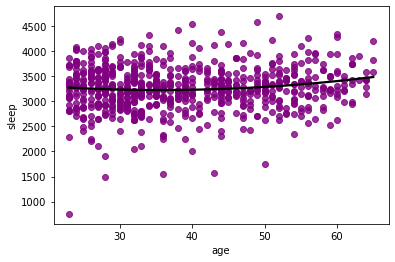

In [59]:
sns.regplot(order=2, data=df, y='sleep', x='age', ci=None, color='purple', line_kws={"color": "black"})

In [60]:
#найдем параметры оптимальной прямой sleep на age
# подгонка прямой
fitted_line = smf.ols(formula='sleep~age', data=df).fit()
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept    3128.91
age             3.54
dtype: float64

# Спецификация
$$ sleep = 3128.91 + 3.54*age $$
С возрастом количество сна увеличивается на 3.54 минуты в неделю.

In [61]:
#найдем параметры оптимальной прямой sleep на age без константы
fitted_line = smf.ols(formula='sleep~-1+age', data=df).fit()
fitted_line.params.round(2)

age    77.82
dtype: float64

# Спецификация
$$ sleep = 77.82*age $$

# Пример 2.1.3

<AxesSubplot:xlabel='totwrk', ylabel='sleep'>

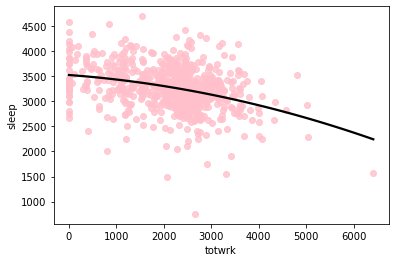

In [62]:
#построим диаграмму рассеяним sleep vs totwrk с ‘подогнанной’ параболой
sns.regplot(data=df, y='sleep', x='totwrk', ci=None, order=2, color='pink', line_kws={"color": "black"})

In [63]:
#найдем параметры оптимальной параболы sleep на totwrk, totwrk2
# подгонка параболы
fitted_pol = smf.ols(formula='sleep~totwrk+I(totwrk**2)', data=df).fit()
# коэффициенты с округлением
fitted_pol.params.round(2)

Intercept         3523.59
totwrk              -0.07
I(totwrk ** 2)      -0.00
dtype: float64

# Спецификация
$$ sleep = 3523.59-0.07*totwrk-0.00*totwork^2 $$

# Пример 2.1.4

<AxesSubplot:xlabel='age', ylabel='sleep'>

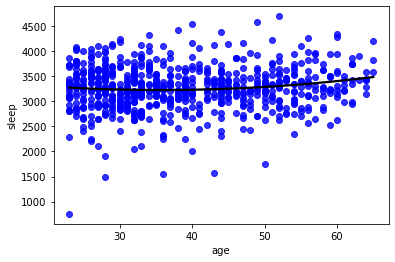

In [64]:
#построим диаграмму рассеяним sleep vs age с ‘подогнанной’ параболой
sns.regplot(data=df, y='sleep', x='age', ci=None, order=2, color='blue', line_kws={"color": "black"})

In [65]:
#найдем параметры оптимальной параболы sleep на age, age2
# подгонка параболы
fitted_pol = smf.ols(formula='sleep~age+I(age**2)', data=df).fit()
# коэффициенты с округлением
fitted_pol.params.round(2)

Intercept      3608.03
age             -21.49
I(age ** 2)       0.30
dtype: float64

# Спецификация
$$ sleep = 3608.03-21.49*age+0.30*age^2 $$

# Пример 2.1.5

In [66]:
#найдем параметры оптимальной плоскости sleep на totwrk, age
# подгонка плоскости
fitted_plane = smf.ols(formula='sleep~totwrk+age', data=df).fit()
# коэффициенты с округлением
fitted_plane.params.round(2)

Intercept    3469.20
totwrk         -0.15
age             2.92
dtype: float64

# Спецификация
$$ sleep = 3469.20 -0.15totwrk + 2.92*age $$